In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/gene_expression.csv')

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [5]:
df.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


<Axes: xlabel='Cancer Present', ylabel='count'>

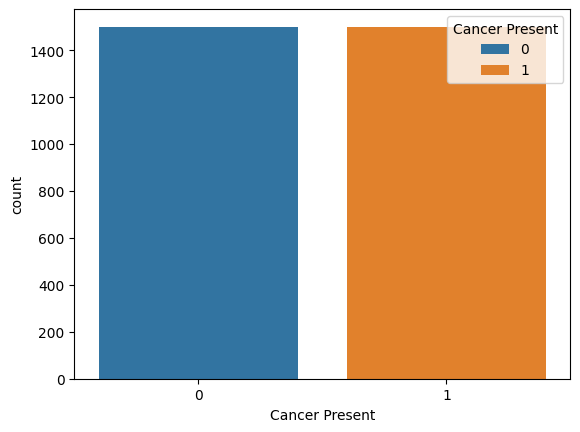

In [6]:
sns.countplot(data=df, x='Cancer Present', hue='Cancer Present')

<Axes: >

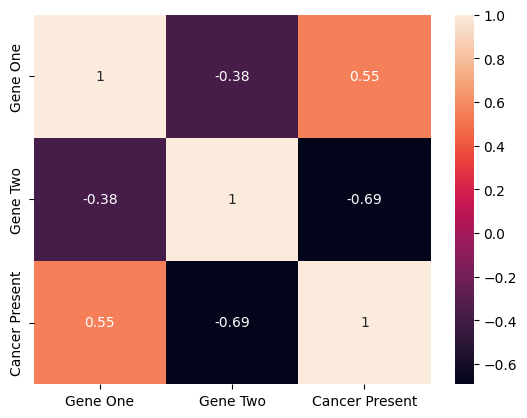

In [7]:
sns.heatmap(df.corr(), annot=True)

- a positive correlation with Gene One and Cancer Present
- and a negative corrleation with Gene Two and Cancer Present.

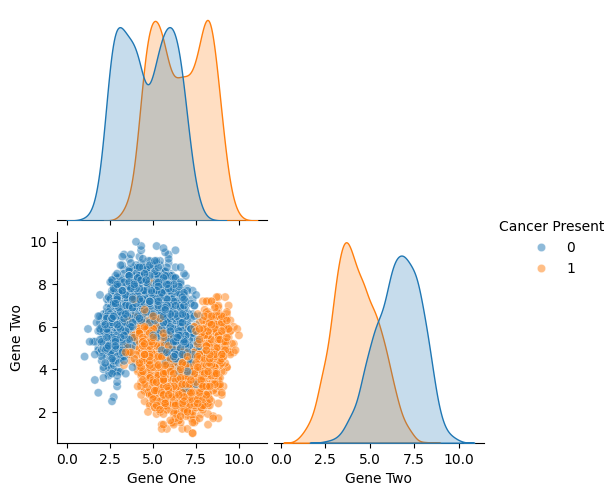

In [8]:
sns.pairplot(df, hue='Cancer Present', plot_kws={'alpha':0.5}, corner=True)

- Seem like Gene One Cancer Present or not, are overlapped a lot than in Gene Two.

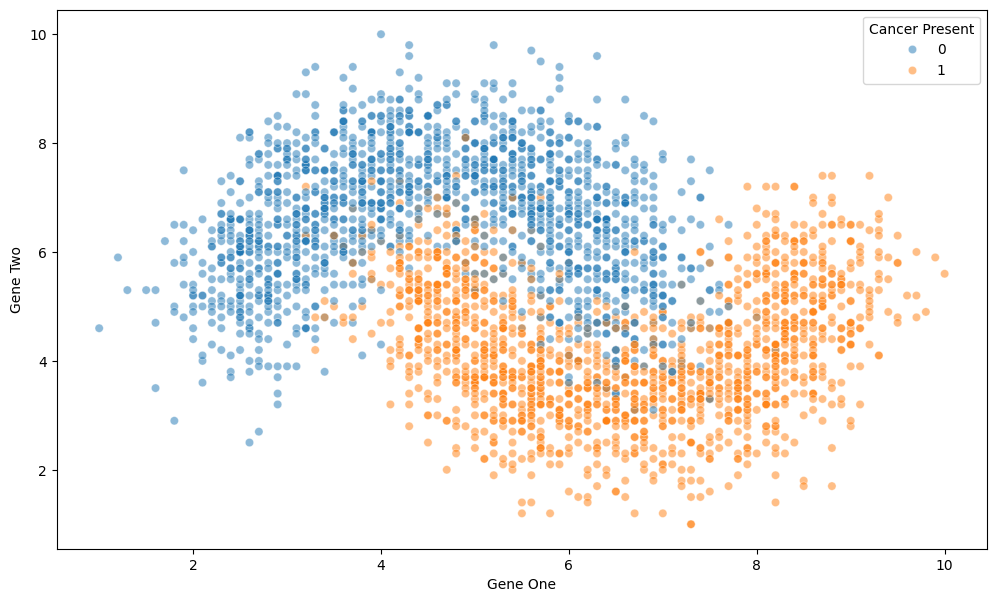

In [9]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present', alpha=0.5);

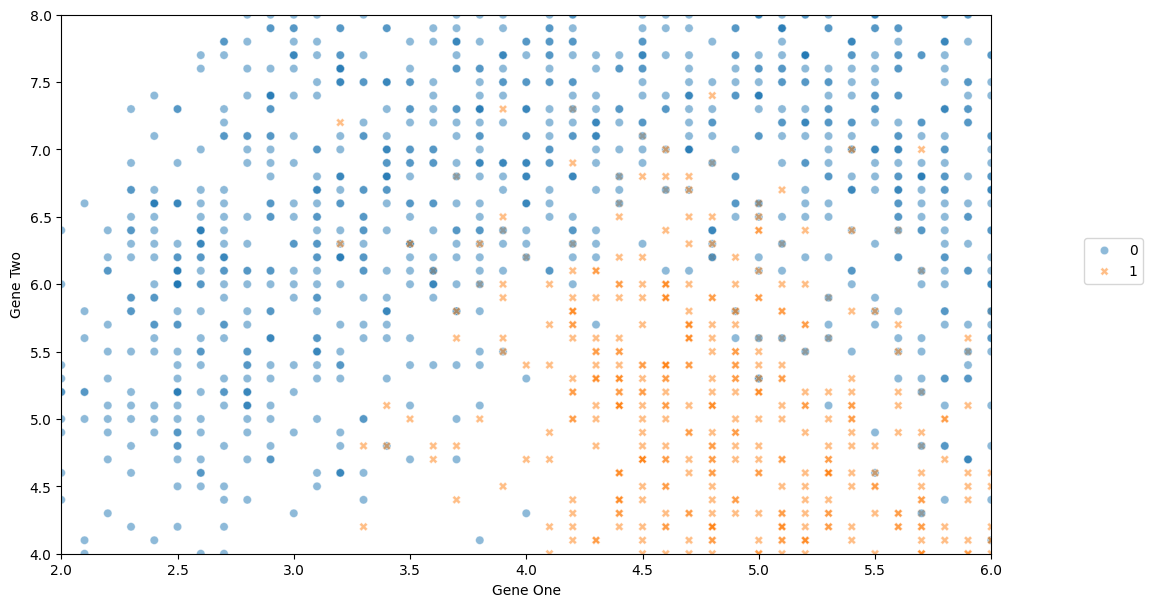

In [10]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present', alpha=0.5, style='Cancer Present')
plt.xlim(2, 6)
plt.ylim(4, 8)
plt.legend(loc=(1.1, 0.5))

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
X = df.drop('Cancer Present', axis=1)
y = df['Cancer Present']

In [13]:
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighb

In [17]:
#Simple model with neighbor 1
knn_model = KNeighborsClassifier(n_neighbors=1)

In [18]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
y_pred = knn_model.predict(scaled_X_test)

In [20]:
y_pred

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, RocCurveDisplay

In [22]:
confusion_matrix(y_test, y_pred)

array([[422,  48],
       [ 50, 380]])

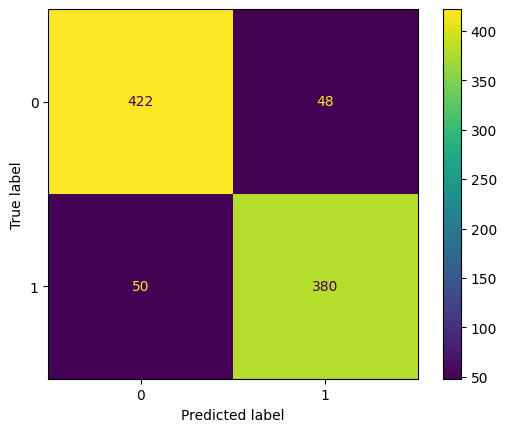

In [23]:
ConfusionMatrixDisplay.from_estimator(knn_model, scaled_X_test, y_test)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       470
           1       0.89      0.88      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



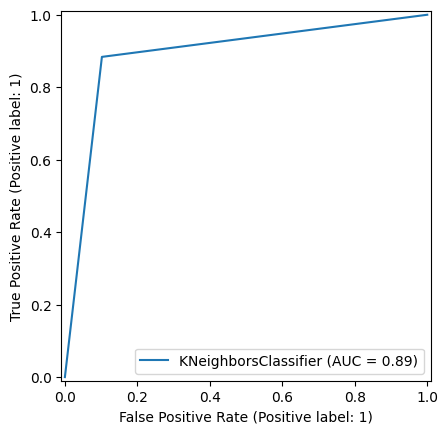

In [25]:
RocCurveDisplay.from_estimator(knn_model, scaled_X_test, y_test)

- Methods for choosing K values
  - elbow method
  - K fold crosss validation Grid Search method

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8911111111111111

In [28]:
error = 1 - accuracy
error

0.10888888888888892

In [29]:
test_error_rates = []

for k in range(1, 30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)

    y_pred = knn_model.predict(scaled_X_test)
    error = 1 - accuracy_score(y_test, y_pred)
    test_error_rates.append(error)

In [30]:
test_error_rates

[0.10888888888888892,
 0.09999999999999998,
 0.07333333333333336,
 0.0755555555555556,
 0.07222222222222219,
 0.06666666666666665,
 0.06444444444444442,
 0.06444444444444442,
 0.05777777777777782,
 0.06333333333333335,
 0.061111111111111116,
 0.06000000000000005,
 0.061111111111111116,
 0.06222222222222218,
 0.05888888888888888,
 0.05777777777777782,
 0.05666666666666664,
 0.05555555555555558,
 0.053333333333333344,
 0.053333333333333344,
 0.054444444444444406,
 0.05111111111111111,
 0.054444444444444406,
 0.054444444444444406,
 0.05666666666666664,
 0.05666666666666664,
 0.05555555555555558,
 0.05777777777777782,
 0.05777777777777782]

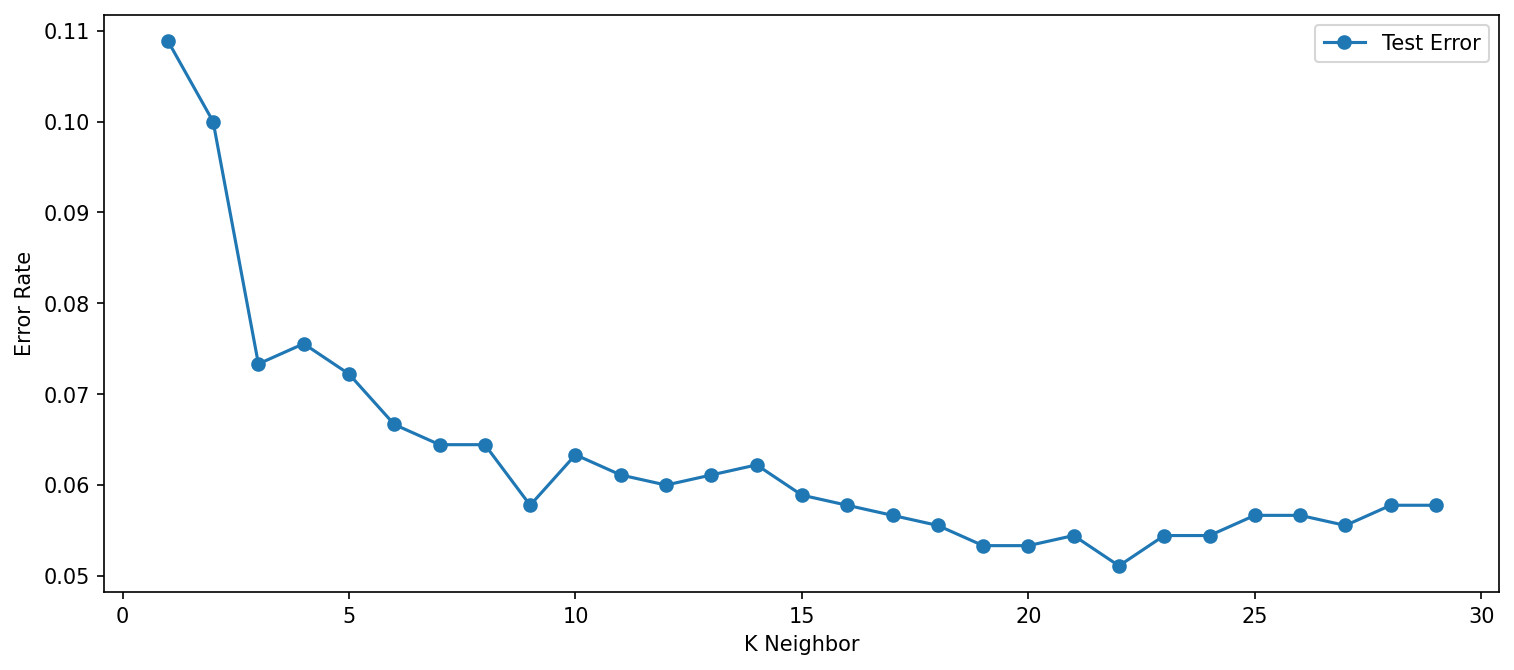

In [31]:
plt.figure(figsize=(12,5), dpi=150)
plt.plot(range(1, 30), test_error_rates, 'o-', label='Test Error')
plt.xlabel('K Neighbor')
plt.ylabel('Error Rate')
plt.legend()

- Here we may be tempted to choose K value of lowest error rate.

  - However we need to take note that higher K value means MORE complex model.
    - There is no so much improvement error rate start from K value of around 8 or 9 .. all the way to the higer K value.
    - So we need to make a call of whether chooing a K value of 16 is really worth to use, to drop an error rate of 1%.
    - Although it depends to context, we need to take into consideration for all those points.

In [32]:
scaler = StandardScaler()
knn = KNeighborsClassifier()

In [33]:
operations = [('scaler', scaler), ('knn', knn)]

In [34]:
from sklearn.pipeline import Pipeline
pipe = Pipeline(operations)

In [35]:
# we don't really have to use pipeline for GridSearchCV
# but pipeline allows us to streamline our codes and operations
from sklearn.model_selection import GridSearchCV

In [36]:
# defining range of k values want to setup
k_values = list(range(1, 20))

In [37]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [38]:
# setup parameters
parameters = {'knn__n_neighbors': k_values}

In [39]:
full_cv_classifier = GridSearchCV(pipe, parameters, cv=5, scoring='accuracy')

In [40]:
full_cv_classifier.fit(X_train, y_train)
#don't need to manually scale the train data. Because piepeline will take care of it as we define the scaling step as 1st step
#of operations. so we can just pass in X_train directly.

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [41]:
# check the best estimator
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=16))],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=16),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 16,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [42]:
full_cv_classifier.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [43]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.90428571, 0.90619048, 0.92095238, 0.91333333, 0.92428571,
       0.92047619, 0.92428571, 0.92571429, 0.9247619 , 0.92238095,
       0.9247619 , 0.92380952, 0.92809524, 0.92857143, 0.92809524,
       0.92904762, 0.92857143, 0.92857143, 0.92714286])

In [44]:
len(full_cv_classifier.cv_results_['mean_test_score'])

19

In [45]:
full_pred = full_cv_classifier.predict(X_test)

In [46]:
print(classification_report(y_test, full_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



- We just saw that our GridSearch recommends a K=14 (in line with our alternative Elbow Method). Let's now use the PipeLine again, but this time, no need to do a grid search, instead we will evaluate on our hold-out Test Set.

In [47]:
scaler = StandardScaler()
knn14 = KNeighborsClassifier(n_neighbors=14)

In [48]:
operations = [('scaler', scaler),('knn14', knn14)]

In [49]:
pipeline = Pipeline(operations)

In [50]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn14', KNeighborsClassifier(n_neighbors=14))])

In [51]:
pipeline_pred = pipeline.predict(X_test)

In [52]:
print(classification_report(y_test, pipeline_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       470
           1       0.95      0.92      0.93       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [53]:
new_patient = [[3.8, 6.4]]

In [54]:
pipeline.predict(new_patient)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [55]:
pipeline.predict_proba(new_patient)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[1., 0.]])

- We are pretty much sure that this new patient doesn't have cancer.